# Cyclone Patterns & Classification

Excel file contain 4 cyclone Type classification 
1.Typhoon
2.Severe Tropical Storm
3.Tropical Storm
4.Tropical Depression

Category	                              Sustained winds
1.Typhoon                     (T)	          ≥118 km/h

2.Severe Tropical Storm	      (SS)            89–117 km/h

3.Tropical Storm 	          (S)             62–88 km/h
 
4.Tropical Depression)        (D)              ≤61 km/h

Classification     TypeName                      Type
 
   1               Typhoon                       T
   2               Severe Tropical Storm         SS
   3               Tropical Storm                S
   4               Tropical Depression           D

In [352]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

In [353]:
import warnings
warnings.filterwarnings('ignore')

In [354]:
cyc_df=pd.read_excel('/Users/n.sunik/Downloads/Cyclone Excel File.xlsx')
#/Users/n.sunik/IBM_Internship

In [355]:
cyc_df

,Year,Month,Date,Time,CycloneName,TypeName,Type,Wind(km/h),Pressure(mb)
0,2021.0,December,Dec 18,11:30,Typhoon Rai (Odette) 2021,Typhoon,T,170.0,962.0
1,2021.0,December,Dec 19,17:30,Typhoon Rai (Odette) 2021,Typhoon,T,165.0,957.0
2,2021.0,December,Dec 19,23:30,Typhoon Rai (Odette) 2021,Typhoon,T,170.0,962.0
3,2021.0,December,Dec 17,17:30,Typhoon Rai (Odette) 2021,Typhoon,T,175.0,963.0
4,2021.0,December,Dec 15,5:30,Typhoon Rai (Odette) 2021,Typhoon,T,120.0,985.0
...,...,...,...,...,...,...,...,...,...
169,2021.0,NaN,2021-01-19 00:00:00,02:30:00,NaN,TROPICAL STORM,S,90.0,997.0
170,2021.0,NaN,2021-01-19 00:00:00,02:30:00,NaN,TROPICAL STORM,S,90.0,996.0
171,2021.0,NaN,2021-01-20 00:00:00,02:30:00,NaN,TROPICAL STORM,S,80.0,996.0
172,2021.0,NaN,2021-01-20 00:00:00,05:30:00,NaN,TROPICAL STORM,S,65.0,1000.0


174 rows × 9 columns

In [356]:
cyc_df.describe(include='all')

,Year,Month,Date,Time,CycloneName,TypeName,Type,Wind(km/h),Pressure(mb)
count,171.000000,42,172,172,42,172,170,172.000000,172.000000
unique,NaN,3,71,17,3,4,4,NaN,NaN
top,NaN,September,2021-01-18 00:00:00,02:30:00,Typhoon Malou 2021,TROPICAL STORM,S,NaN,NaN
freq,NaN,25,8,25,25,53,53,NaN,NaN
mean,2016.660819,NaN,NaN,NaN,NaN,NaN,NaN,93.866279,987.058140
std,4.124766,NaN,NaN,NaN,NaN,NaN,NaN,37.986911,14.509005
min,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,949.000000
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,979.000000
50%,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,989.000000
75%,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,120.000000,1000.000000


In [357]:
cyc_df.head()

,Year,Month,Date,Time,CycloneName,TypeName,Type,Wind(km/h),Pressure(mb)
0,2021.0,December,Dec 18,11:30,Typhoon Rai (Odette) 2021,Typhoon,T,170.0,962.0
1,2021.0,December,Dec 19,17:30,Typhoon Rai (Odette) 2021,Typhoon,T,165.0,957.0
2,2021.0,December,Dec 19,23:30,Typhoon Rai (Odette) 2021,Typhoon,T,170.0,962.0
3,2021.0,December,Dec 17,17:30,Typhoon Rai (Odette) 2021,Typhoon,T,175.0,963.0
4,2021.0,December,Dec 15,5:30,Typhoon Rai (Odette) 2021,Typhoon,T,120.0,985.0


In [358]:
cyc_df.tail()

,Year,Month,Date,Time,CycloneName,TypeName,Type,Wind(km/h),Pressure(mb)
169,2021.0,NaN,2021-01-19 00:00:00,02:30:00,NaN,TROPICAL STORM,S,90.0,997.0
170,2021.0,NaN,2021-01-19 00:00:00,02:30:00,NaN,TROPICAL STORM,S,90.0,996.0
171,2021.0,NaN,2021-01-20 00:00:00,02:30:00,NaN,TROPICAL STORM,S,80.0,996.0
172,2021.0,NaN,2021-01-20 00:00:00,05:30:00,NaN,TROPICAL STORM,S,65.0,1000.0
173,2021.0,NaN,2021-01-21 00:00:00,05:30:00,NaN,TROPICAL STORM,S,85.0,999.0


In [359]:
cyc_df.dtypes

Year            float64
Month            object
Date             object
Time             object
CycloneName      object
TypeName         object
Type             object
Wind(km/h)      float64
Pressure(mb)    float64
dtype: object

In [360]:
cyc_df.Type.value_counts()

S     53
D     50
T     40
SS    27
Name: Type, dtype: int64

In [361]:
# delete a unnecessary columns with respect to  target value cycloneType/cyclone Type NAME
cyc_df = cyc_df.drop(columns = ['CycloneName','Month','Date','Time','Type'])
cyc_df.head()

,Year,TypeName,Wind(km/h),Pressure(mb)
0,2021.0,Typhoon,170.0,962.0
1,2021.0,Typhoon,165.0,957.0
2,2021.0,Typhoon,170.0,962.0
3,2021.0,Typhoon,175.0,963.0
4,2021.0,Typhoon,120.0,985.0


In [362]:
#df_slovakia=df[(df['location']=='Slovakia')]

In [363]:
cyc_df.TypeName.unique()

array(['Typhoon', 'TROPICAL DEPRESSION', nan, 'SEVERE TROPICAL STORM',
       'TROPICAL STORM'], dtype=object)

In this excel file cyclone data are classified as
1.Tropical Depression
2.Tropical Storm 
3.Typhoon 
4.SEVERE TROPICAL STORM

In [364]:
#cyc_df.Year.sort()
cyc_df.Year.sort_values()

43     2009.0
122    2009.0
121    2009.0
93     2009.0
47     2009.0
        ...  
119    2021.0
173    2021.0
41        NaN
92        NaN
120       NaN
Name: Year, Length: 174, dtype: float64

In [365]:
cyc_df.Year.unique()
#years are 2009 - 2021

array([2021.,   nan, 2009., 2010., 2011., 2012., 2013., 2015., 2016.,
       2017., 2018., 2019., 2020., 2014.])

In [366]:
cyc_df.dtypes

Year            float64
TypeName         object
Wind(km/h)      float64
Pressure(mb)    float64
dtype: object

In [367]:
cyc_df.head()

,Year,TypeName,Wind(km/h),Pressure(mb)
0,2021.0,Typhoon,170.0,962.0
1,2021.0,Typhoon,165.0,957.0
2,2021.0,Typhoon,170.0,962.0
3,2021.0,Typhoon,175.0,963.0
4,2021.0,Typhoon,120.0,985.0


In [368]:
cyc_df.dtypes
#cyc_df.Year = pd.to_datetime(cyc_df.Year ,format='%Y')
# pd.to_datetime(df.Year, format='%Y')

Year            float64
TypeName         object
Wind(km/h)      float64
Pressure(mb)    float64
dtype: object

In [369]:
cyc_df.dtypes

Year            float64
TypeName         object
Wind(km/h)      float64
Pressure(mb)    float64
dtype: object

In [370]:
cyc_df.isnull().sum()

Year            3
TypeName        2
Wind(km/h)      2
Pressure(mb)    2
dtype: int64

In [371]:
#df.dropna(),missing values
cyc_df.dropna(inplace=True)
#df.dropna(how='any',axis=0)

In [372]:
cyc_df.isnull().sum()

Year            0
TypeName        0
Wind(km/h)      0
Pressure(mb)    0
dtype: int64

In [373]:
cyc_df.dtypes

Year            float64
TypeName         object
Wind(km/h)      float64
Pressure(mb)    float64
dtype: object

In [374]:
cyc_df.TypeName.value_counts()

TROPICAL STORM           53
TROPICAL DEPRESSION      50
Typhoon                  41
SEVERE TROPICAL STORM    27
Name: TypeName, dtype: int64

In [375]:
# height=4, aspect=.7

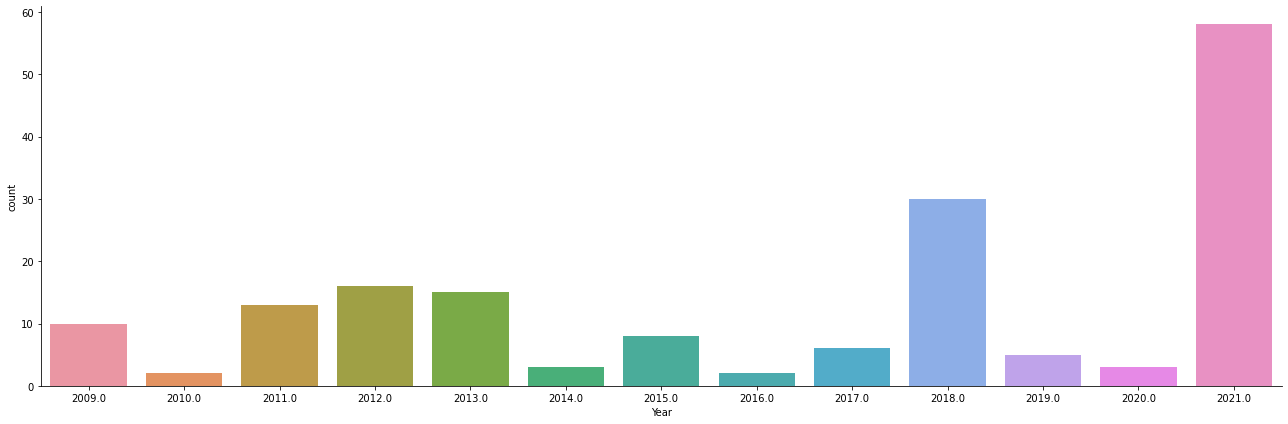

In [376]:
sns.factorplot('Year',data=cyc_df,kind='count',height=6,aspect=3)
#plt.figure(figsize=(15,12))
#date
#plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

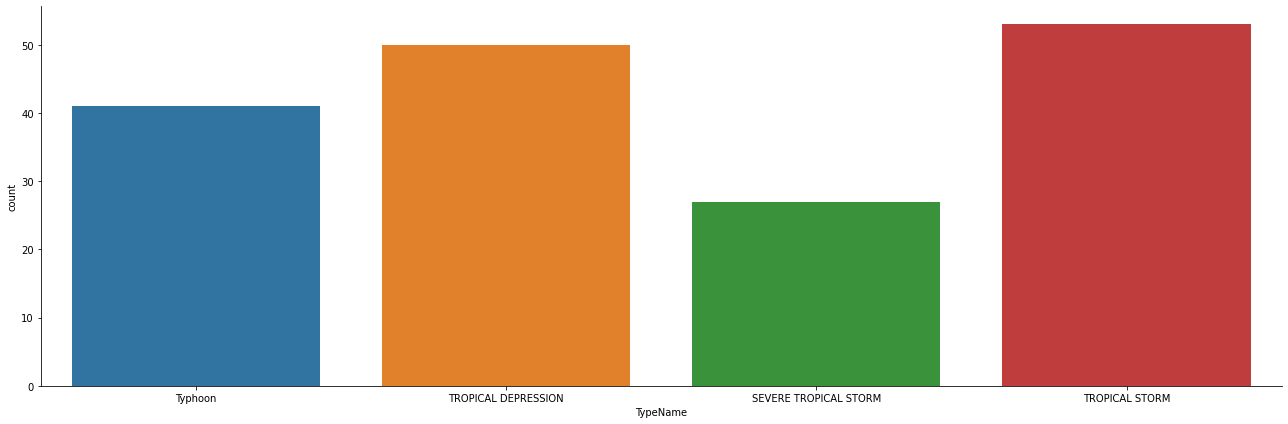

<Figure size 1440x1440 with 0 Axes>

In [377]:
sns.factorplot('TypeName',data=cyc_df,kind='count',height=6,aspect=3)
#plt.figure(figsize=(15,12))
#date
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

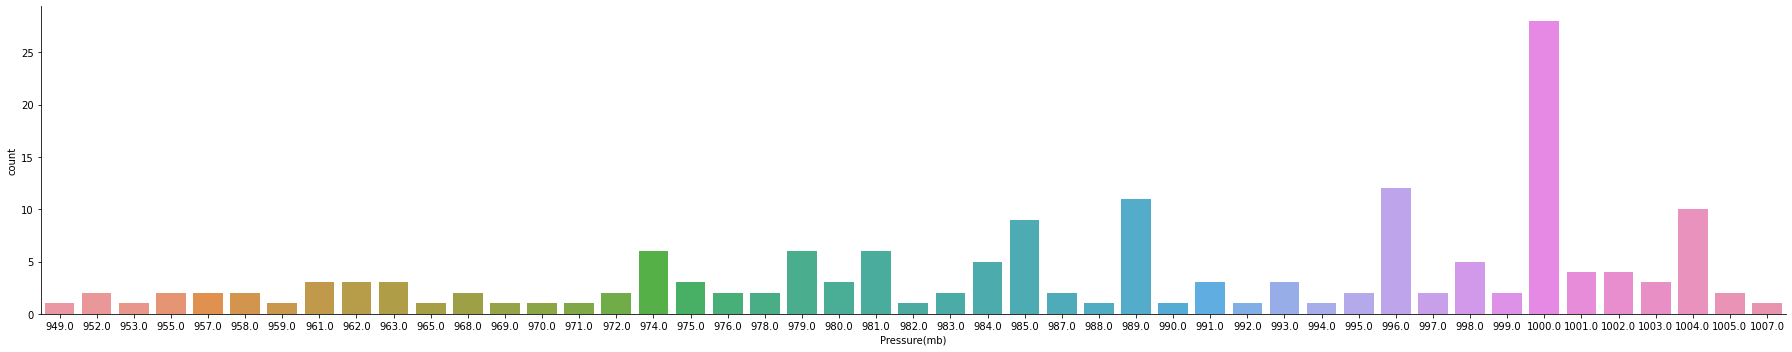

<Figure size 1440x1440 with 0 Axes>

In [378]:
sns.factorplot('Pressure(mb)',data=cyc_df,kind='count',aspect=5,height=5)
#plt.figure(figsize=(15,12))
#date
plt.figure(figsize=(20,20))

<Figure size 504x288 with 0 Axes>

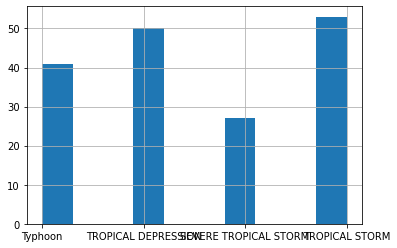

<Figure size 504x288 with 0 Axes>

In [379]:
# histograms
cyc_df['TypeName'].hist()
#figure(figsize=(20,20))
plt.figure(figsize=(7,4))

In [380]:
cyc_df['TypeName']

0             Typhoon
1             Typhoon
2             Typhoon
3             Typhoon
4             Typhoon
            ...      
169    TROPICAL STORM
170    TROPICAL STORM
171    TROPICAL STORM
172    TROPICAL STORM
173    TROPICAL STORM
Name: TypeName, Length: 171, dtype: object

In [381]:
#cyc_df['Type'].dropna([Type.s,Type.ss],inplace=True)

<AxesSubplot:>

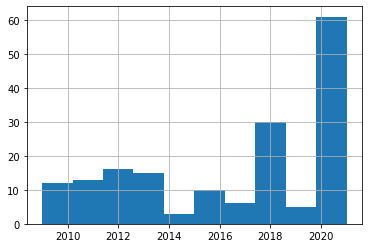

In [382]:
# histograms
cyc_df['Year'].hist()

<AxesSubplot:>

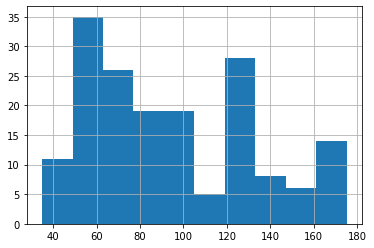

In [383]:
# histograms
cyc_df['Wind(km/h)'].hist()

In [384]:
#not distributed properly

<AxesSubplot:>

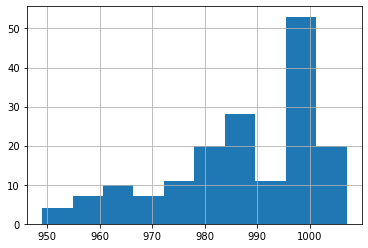

In [385]:
# histograms
cyc_df['Pressure(mb)'].hist()

#left skewed

<AxesSubplot:xlabel='TypeName', ylabel='Wind(km/h)'>

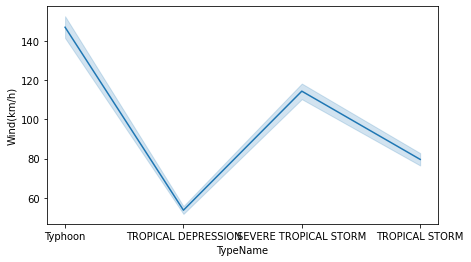

In [386]:
plt.figure(figsize=(7,4))
sns.lineplot(y=cyc_df['Wind(km/h)'], x=cyc_df['TypeName'])

In [387]:
#left skewed

<AxesSubplot:xlabel='TypeName', ylabel='Wind(km/h)'>

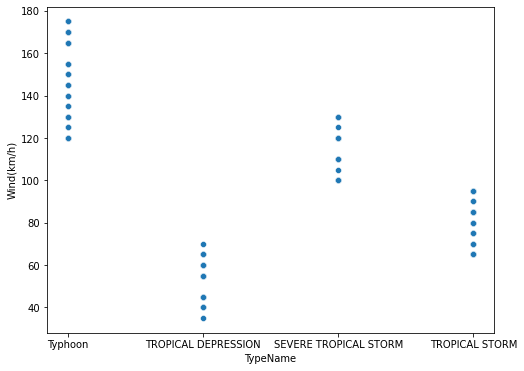

In [388]:
#scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(y=cyc_df['Wind(km/h)'], x=cyc_df['TypeName'])

<AxesSubplot:xlabel='Wind(km/h)', ylabel='TypeName'>

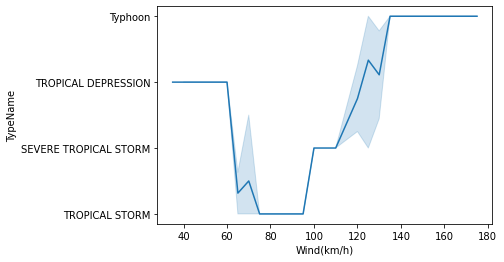

In [389]:
#plt.figure(figsize=(7,4))
sns.lineplot(x=cyc_df['Wind(km/h)'], y=cyc_df['TypeName'])

In [390]:
#Typhoon has a maximum windspeed
#Tropical strom minimum wind speed

<AxesSubplot:xlabel='Wind(km/h)', ylabel='Pressure(mb)'>

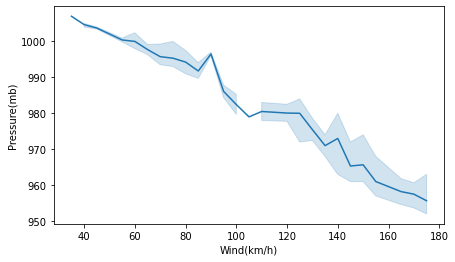

In [391]:
plt.figure(figsize=(7,4))
sns.lineplot(x=cyc_df['Wind(km/h)'], y=cyc_df['Pressure(mb)'])

#when pressure is high wind speed is low

<AxesSubplot:xlabel='Wind(km/h)', ylabel='TypeName'>

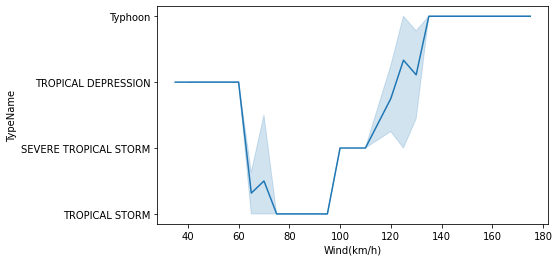

In [392]:
plt.figure(figsize=(7,4))
sns.lineplot(x=cyc_df['Wind(km/h)'], y=cyc_df['TypeName'])

Text(0.5, 1.0, 'Year vs Type')

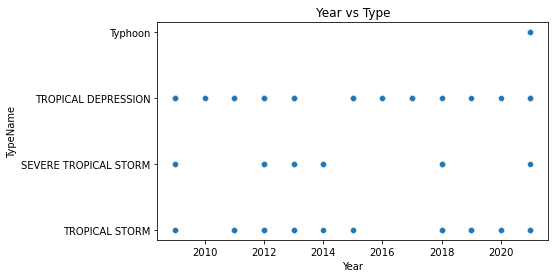

In [393]:
#date
plt.figure(figsize=(7,4))
sns.scatterplot(x=cyc_df['Year'], y=cyc_df['TypeName'])
plt.title('Year vs Type')

Text(0.5, 1.0, 'Year vs Type')

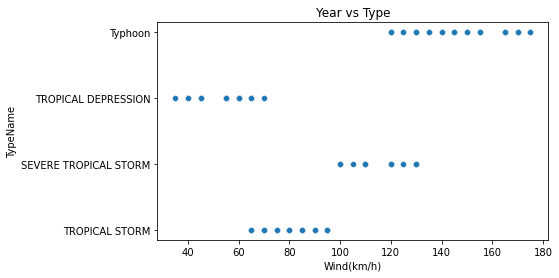

In [394]:
#date
plt.figure(figsize=(7,4))
sns.scatterplot(x=cyc_df['Wind(km/h)'], y=cyc_df['TypeName'])
plt.title('Year vs Type')

Text(0.5, 1.0, 'Pressure(mb) vs TypeName')

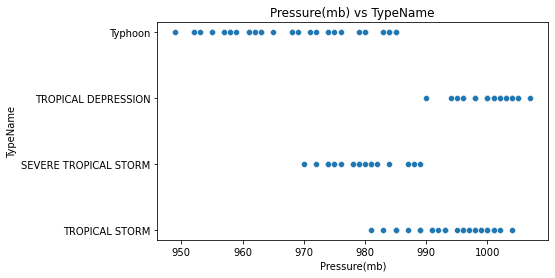

In [395]:
#date
plt.figure(figsize=(7,4))
sns.scatterplot(x=cyc_df['Pressure(mb)'], y=cyc_df['TypeName'])
plt.title('Pressure(mb) vs TypeName')

In [396]:
cyc_df.columns

Index(['Year', 'TypeName', 'Wind(km/h)', 'Pressure(mb)'], dtype='object')

In [397]:
cyc_df['TypeName'].value_counts()

TROPICAL STORM           53
TROPICAL DEPRESSION      50
Typhoon                  41
SEVERE TROPICAL STORM    27
Name: TypeName, dtype: int64

In [398]:
#len('TypeName')

In [399]:
# scatterplot
colors = ['red', 'orange', 'blue','green']
TypeName = ['TROPICAL STORM','TROPICAL DEPRESSION','Typhoon','SEVERE TROPICAL STORM']

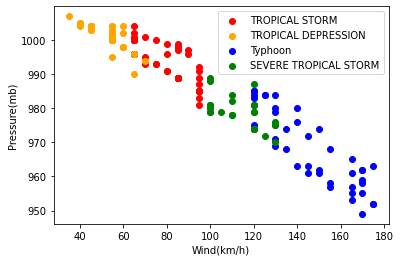

In [400]:
for i in range(len(TypeName)):
    x =cyc_df[cyc_df['TypeName'] == TypeName[i]]
    plt.scatter(x['Wind(km/h)'], x['Pressure(mb)'], c = colors[i], label=TypeName[i])
plt.xlabel("Wind(km/h)")
plt.ylabel("Pressure(mb)")
plt.legend()

In [401]:
cyc_df.corr()

,Year,Wind(km/h),Pressure(mb)
Year,1.000000,0.539226,-0.425370
Wind(km/h),0.539226,1.000000,-0.959354
Pressure(mb),-0.425370,-0.959354,1.000000


<AxesSubplot:>

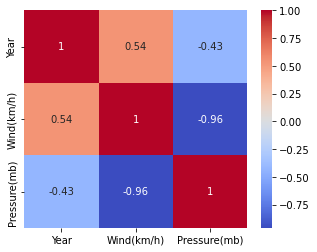

In [402]:
corr = cyc_df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [403]:
cyc_df.head()

,Year,TypeName,Wind(km/h),Pressure(mb)
0,2021.0,Typhoon,170.0,962.0
1,2021.0,Typhoon,165.0,957.0
2,2021.0,Typhoon,170.0,962.0
3,2021.0,Typhoon,175.0,963.0
4,2021.0,Typhoon,120.0,985.0


In [404]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [405]:
#cyc_df['TypeName'] = le.fit_transform(cyc_df['TypeName'])
#cyc_df.head()

In [406]:
from sklearn.model_selection import train_test_split
X = cyc_df.drop(columns=['TypeName'])
Y = cyc_df['TypeName']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30) # train-70, test-30

#OR

#from sklearn import model_selection
#te = model_selection.train_test_split
#X = df.drop(columns=['Species'])
#Y = df['Species']
#x_train, x_test, y_train, y_test = te(X, Y, test_size=0.30)'

In [407]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=700)
#OR

#from sklearn import linear_model
#model = linear_model.LogisticRegression()

In [408]:
# model training
model.fit(x_train, y_train)

LogisticRegression(max_iter=700)

In [409]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  90.38461538461539


In [410]:
# print metric to get performance
#print("Accuracy: ",model.score(x_test, y_test) * 100)

In [411]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [412]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [413]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  86.53846153846155


In [414]:
# print metric to get performance
#print("Accuracy: ",model.score(x_test, y_test) * 100)

In [415]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [416]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [417]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [418]:
# print metric to get performance
#print("Accuracy: ",model.score(x_test, y_test) * 100)

# Testing with other data

#The Test csv file contains different classification Type(10 cyclone Type classification)

In [419]:
#cyc_df=pd.read_excel('/Users/n.sunik/Downloads/Cyclone Excel File.xlsx')
#/Users/n.sunik/IBM_Internship

In [420]:
cyc_df1=pd.read_csv('/Users/n.sunik/Pictures/Cyclone _Dataset_4.csv')
#/Users/n.sunik/IBM_Internship

In [421]:
cyc_df1.head()

,Sl No.,Name,Year,Date,Time,Type,Wind Speed,Pressure
0,1,Fani,2019,3-May,11:30 AM,EC,215,942
1,2,Fani,2019,3-May,8:30 AM,EC,225,932
2,3,Fani,2019,3-May,5:30 AM,EC,235,923
3,4,Fani,2019,3-May,2:30 AM,SU,245,921
4,5,Fani,2019,2-May,11:30 PM,SU,250,920


In [422]:
cyc_df1.dtypes

Sl No.         int64
Name          object
Year           int64
Date          object
Time          object
Type          object
Wind Speed     int64
Pressure       int64
dtype: object

In [423]:
cyc_df1.Type.value_counts()

C     156
D     114
VC     95
DD     81
EC     73
SC     73
B      45
SU     32
M      30
S       9
Name: Type, dtype: int64

In [424]:
# delete a column
cyc_df1 = cyc_df1.drop(columns = ['Name','Date','Time','Sl No.'])
cyc_df1.head()

,Year,Type,Wind Speed,Pressure
0,2019,EC,215,942
1,2019,EC,225,932
2,2019,EC,235,923
3,2019,SU,245,921
4,2019,SU,250,920


In [425]:
cyc_df1.Type.value_counts()

C     156
D     114
VC     95
DD     81
EC     73
SC     73
B      45
SU     32
M      30
S       9
Name: Type, dtype: int64

In [426]:
#len(Type)

In [427]:
# scatterplot
colors = ['red', 'orange', 'blue','green','pink','black','yellow','purple','gray','lime']
Type = ['C','D','VC','DD','EC','SC','B','SU','M','S']
#C=Cyclonic Storm

In [428]:
#len(Type)

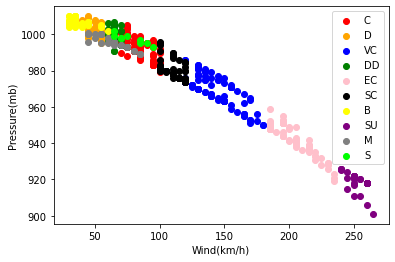

In [429]:
for i in range(len(Type)):
    x =cyc_df1[cyc_df1['Type'] == Type[i]]
    plt.scatter(x['Wind Speed'], x['Pressure'], c = colors[i], label=Type[i])
plt.xlabel("Wind(km/h)")
plt.ylabel("Pressure(mb)")
plt.legend()

 1.C=Cyclonic Storm
 2.D = Depression
 3.VC =Very Severe Cyclonic Storm
 4.DD = Deep Depression
 5.EC = Extremely severe
 6.SU =Super Cyclonic
 7.SC = Severe Cyclonic
 8.B = Disturbance
 9.M = 
10.S = Moderate Tropical Storm

In [430]:
from sklearn.model_selection import train_test_split
X = cyc_df1.drop(columns=['Type'])
Y = cyc_df1['Type']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30) # train-70, test-30

In [431]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [432]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [433]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  91.07981220657277


In [434]:
#Accuracy:  92.01877934272301

# Compareing  different type of models 

In [435]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [436]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

LR: 0.857505 (0.120669)
LDA: 0.800825 (0.099646)
KNN: 0.833682 (0.111801)
CART: 0.863360 (0.130299)
NB: 0.819537 (0.138418)
SVM: 0.220121 (0.083736)


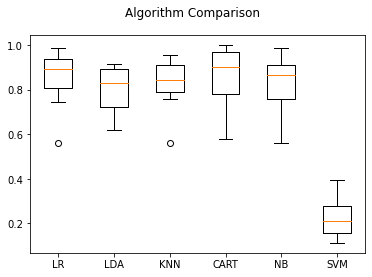

In [437]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Support Vector Machine” (SVM)